# Assessment 2



In [2]:
import numpy as np
import matplotlib.pyplot as plt

[[9.9999988e-01 0.0000000e+00 0.0000000e+00]
 [1.2000000e-07 0.0000000e+00 0.0000000e+00]]
[[9.99999520e-01 0.00000000e+00 0.00000000e+00]
 [4.80001094e-07 0.00000000e+00 0.00000000e+00]]
[[9.99998920e-01 0.00000000e+00 0.00000000e+00]
 [1.08000657e-06 0.00000000e+00 0.00000000e+00]]
[[9.99998080e-01 0.00000000e+00 0.00000000e+00]
 [1.92002189e-06 0.00000000e+00 0.00000000e+00]]
[[9.99997000e-01 0.00000000e+00 0.00000000e+00]
 [3.00005472e-06 0.00000000e+00 0.00000000e+00]]
[[9.99995680e-01 0.00000000e+00 0.00000000e+00]
 [4.32011492e-06 0.00000000e+00 0.00000000e+00]]
[[9.99994120e-01 0.00000000e+00 0.00000000e+00]
 [5.88021451e-06 0.00000000e+00 0.00000000e+00]]
[[9.99992320e-01 0.00000000e+00 0.00000000e+00]
 [7.68036774e-06 0.00000000e+00 0.00000000e+00]]
[[9.99990279e-01 0.00000000e+00 0.00000000e+00]
 [9.72059103e-06 0.00000000e+00 0.00000000e+00]]
[[9.99987999e-01 0.00000000e+00 0.00000000e+00]
 [1.20009030e-05 0.00000000e+00 0.00000000e+00]]
[[9.99985479e-01 0.00000000e+00 0.00

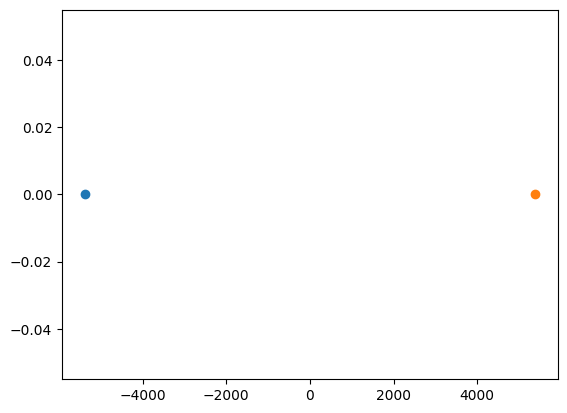

In [98]:
epsilon = 125.7 * 1.38e-23
sigma = 0.3345e-9
argon_mass = 39.948 * 1.67377e-27
tau = np.sqrt(argon_mass * sigma ** 2 / epsilon)

N = 2

def force_coefficient(r):
    return 24 * (-2 * (1 / r) ** 13 + (1 / r) ** 7)

def force_coefficient_2(r):
    return 24 * epsilon / sigma * (-2 * (sigma / r) ** 13 + (sigma / r) ** 7)

pos = np.zeros((N, 3))
pos[0] = np.array([1, 0, 0])

vel = np.zeros((N, 3))

acc = np.zeros((N, 3))

dt = 0.0001
timesteps = 10000

stored_pos = []


def calculate_force(pos_p, pos_j):
    r = np.linalg.norm(pos_p - pos_j)
    r_hat = (pos_p - pos_j) / r
    #print(pos_p, pos_j, r, r_hat)
    return force_coefficient(r) * r_hat


def calculate_acceleration(pos_p, p):
    acc = np.zeros(3)
    for j in range(N):
        if p != j:
            acc += calculate_force(pos_p, pos[j])
            #print(calculate_force(pos_p, pos[j]))
    return acc


for t in range(timesteps):
    for p in range(N):
        acc[p] = calculate_acceleration(pos[p], p)
        #print(acc[p])
    vel += acc * dt * 0.5
    pos += vel * dt
    for p in range(N):
        acc[p] = calculate_acceleration(pos[p], p)
        #print(acc[p])
    vel += acc * dt * 0.5
    #print(vel)
    print(pos)
    for p in range(N):
        stored_pos.append(pos[p])


#print(stored_pos)
fig, ax = plt.subplots()
for i in range(N):
    ax.plot(stored_pos[i][0], stored_pos[i][1], 'o')